In [1]:
import json
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
def calculate_average_attentions(file_path):
    """
    Calculates the average audio and video attention scores for each artist and song
    from a JSON file.

    Args:
        file_path (str): The path to the JSON file containing attention scores.

    Returns:
        dict: A dictionary where keys are "artist - song" and values are dictionaries
              containing 'avg_audio_attention' and 'avg_video_attention'.
    """

    with open(file_path, 'r') as f:
        data = json.load(f)

    average_attentions = {}

    for artist, songs in data.items():
        if artist not in average_attentions:
            average_attentions[artist] = {}
        for song, chunks in songs.items():
            audio_attentions = [chunk['audio_attention'] for chunk in chunks]
            video_attentions = [chunk['video_attention'] for chunk in chunks]
            avg_audio_attention = np.nanmean(audio_attentions)
            avg_video_attention = np.nanmean(video_attentions)
            
            average_attentions[artist][song] = {
                'avg_audio_attention': avg_audio_attention,
                'avg_video_attention': avg_video_attention
            }

    return average_attentions

In [3]:
file_path = 'results/attention_scores_vocal.json'
average_attentions = calculate_average_attentions(file_path)

# Print the results (optional)
for key, value in average_attentions.items():
    print(f"{key}: {value}")

Abhiram Bode: {'Devi Pavane': {'avg_audio_attention': np.float64(0.0039062499658736286), 'avg_video_attention': np.float64(0.003906250001744351)}, 'Entha Bhagyamu': {'avg_audio_attention': np.float64(0.003906249966298724), 'avg_video_attention': np.float64(0.0039062500061782645)}, 'Kalaye': {'avg_audio_attention': np.float64(0.0039062499637414778), 'avg_video_attention': np.float64(0.00390624999461641)}, 'Lekanna ninnu': {'avg_audio_attention': np.float64(0.0039062499649646825), 'avg_video_attention': np.float64(0.003906250003040995)}, 'Nadatina': {'avg_audio_attention': np.float64(0.0039062499649906834), 'avg_video_attention': np.float64(0.003906250000734706)}}
Ameya Karthikeyan: {'Intha Sowkya': {'avg_audio_attention': np.float64(0.003906249965766947), 'avg_video_attention': np.float64(0.003906249996560621)}, 'Iyal Isaiyil': {'avg_audio_attention': np.float64(0.003906249966039081), 'avg_video_attention': np.float64(0.003906250006357695)}, 'Jalajakshi': {'avg_audio_attention': np.floa

In [4]:
def calculate_all_average_attentions(file_path):
    """
    Calculates the average audio and video attention scores for each artist and song
    from a JSON file.

    Args:
        file_path (str): The path to the JSON file containing attention scores.

    Returns:
        dict: A dictionary where keys are "artist - song" and values are dictionaries
              containing 'avg_audio_attention' and 'avg_video_attention'.
    """

    with open(file_path, 'r') as f:
        data = json.load(f)

    all_average_attentions = {}

    for artist, songs in data.items():
        for song, chunks in songs.items():
            audio_attentions = [chunk['audio_attention'] for chunk in chunks]
            video_attentions = [chunk['video_attention'] for chunk in chunks]
            avg_audio_attention = np.nanmean(audio_attentions)
            avg_video_attention = np.nanmean(video_attentions)
            
            all_average_attentions[f"{artist} - {song}"] = {
                'avg_audio_attention': avg_audio_attention,
                'avg_video_attention': avg_video_attention
            }

    return all_average_attentions


In [5]:
all_average_attentions = calculate_all_average_attentions(file_path)

In [6]:
def compute_artist_mean_attentions(file_path):
    """
    Computes the mean of every weight attention for video and audio for each artist.

    Args:
        file_path (str): The path to the JSON file containing attention scores.

    Returns:
        dict: A dictionary where keys are artist names and values are dictionaries
              containing 'mean_audio_attention' and 'mean_video_attention'.
    """
    with open(file_path, 'r') as f:
        data = json.load(f)

    artist_mean_attentions = {}

    for artist, songs in data.items():
        all_audio_weights = []
        all_video_weights = []

        for song, chunks in songs.items():
            audio_weights = np.array([chunk['audio_attention'] for chunk in chunks])
            video_weights = np.array([chunk['video_attention'] for chunk in chunks])

            all_audio_weights.append(audio_weights)
            all_video_weights.append(video_weights)

        # Concatenate all weights for the artist
        all_audio_weights = np.concatenate(all_audio_weights, axis=0)
        all_video_weights = np.concatenate(all_video_weights, axis=0)

        # Calculate the mean for the artist
        mean_audio_attention = np.nanmean(all_audio_weights, axis=0).tolist()
        mean_video_attention = np.nanmean(all_video_weights, axis=0).tolist()

        artist_mean_attentions[artist] = {
            'mean_audio_attention': mean_audio_attention,
            'mean_video_attention': mean_video_attention
        }

    return artist_mean_attentions

# Compute the mean attentions for each artist
artist_mean_attentions = compute_artist_mean_attentions(file_path)

In [7]:
def calculate_final_average_attentions(file_path):
    """
    Calculates the final average audio and video attention scores across the entire dataset
    by averaging every item in the 256 audio and video weights across all chunks, songs, and artists.

    Args:
        file_path (str): The path to the JSON file containing attention scores.

    Returns:
        dict: A dictionary containing 'final_avg_audio_attention' and 'final_avg_video_attention'.
    """

    with open(file_path, 'r') as f:
        data = json.load(f)

    all_audio_weights = []
    all_video_weights = []

    for artist, songs in data.items():
        for song, chunks in songs.items():
            audio_weights = np.array([chunk['audio_attention'] for chunk in chunks])
            video_weights = np.array([chunk['video_attention'] for chunk in chunks])
            
            all_audio_weights.append(audio_weights)
            all_video_weights.append(video_weights)

    # Concatenate all weights across all artists and songs
    all_audio_weights = np.concatenate(all_audio_weights, axis=0)
    all_video_weights = np.concatenate(all_video_weights, axis=0)

    # Calculate the final averages
    final_avg_audio_attention = np.nanmean(all_audio_weights, axis=0).tolist()
    final_avg_video_attention = np.nanmean(all_video_weights, axis=0).tolist()

    return {
        'final_avg_audio_attention': final_avg_audio_attention,
        'final_avg_video_attention': final_avg_video_attention
    }

In [8]:
file_path = 'results/attention_scores_vocal.json'
average_attentions = calculate_final_average_attentions(file_path)

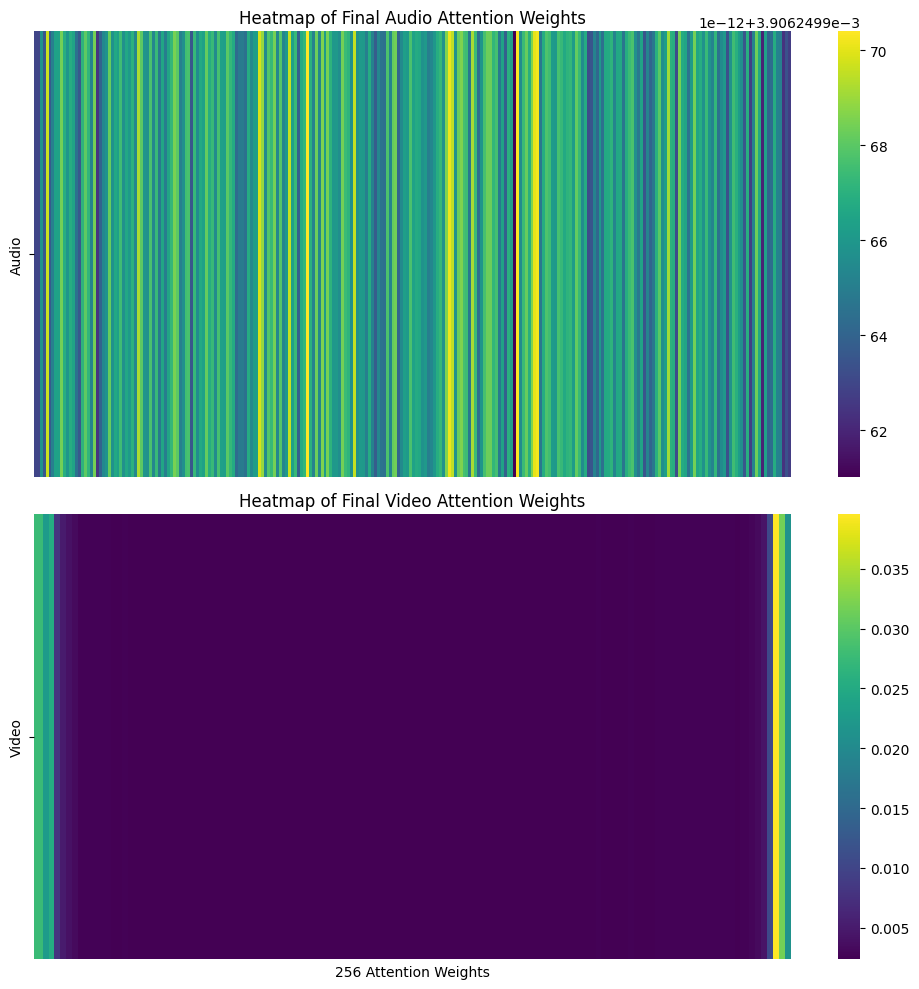

In [9]:
# Create a single figure with two subplots, one on top of the other
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot the heatmap for audio attention weights
sns.heatmap([average_attentions['final_avg_audio_attention']], cmap='viridis', cbar=True, xticklabels=False, yticklabels=['Audio'], ax=axes[0])
axes[0].set_title('Heatmap of Final Audio Attention Weights')

# Plot the heatmap for video attention weights
sns.heatmap([average_attentions['final_avg_video_attention']], cmap='viridis', cbar=True, xticklabels=False, yticklabels=['Video'], ax=axes[1])
axes[1].set_title('Heatmap of Final Video Attention Weights')
axes[1].set_xlabel('256 Attention Weights')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


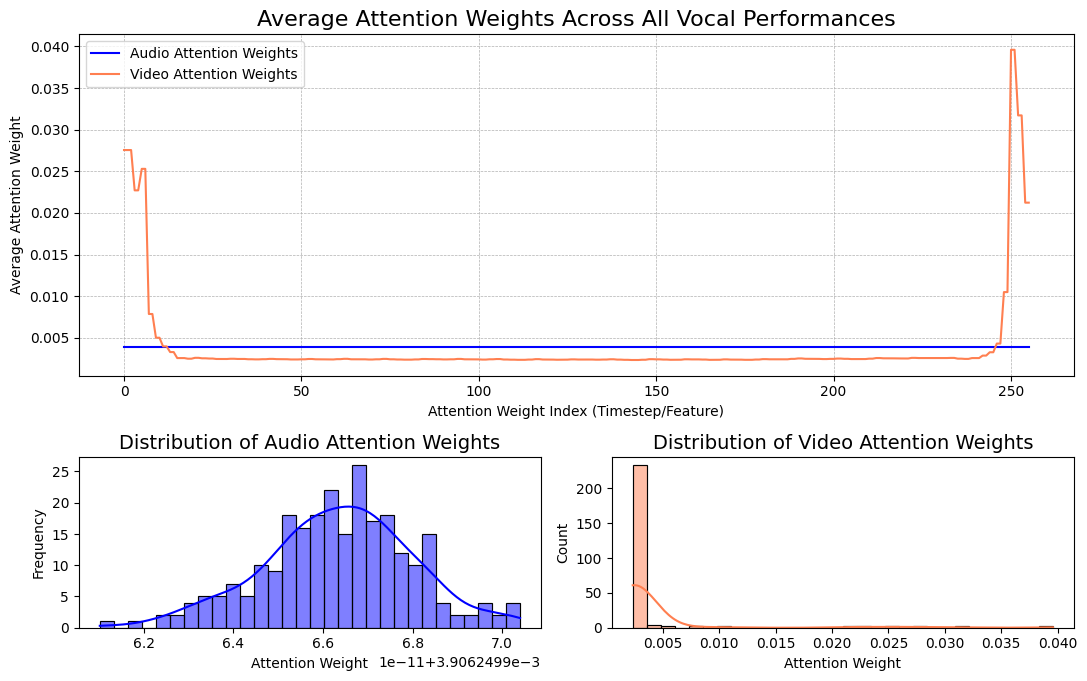

In [23]:
final_audio_attention = average_attentions['final_avg_audio_attention']
final_video_attention = average_attentions['final_avg_video_attention']

# Create a figure with a grid layout
fig = plt.figure(figsize=(11, 9))
grid = fig.add_gridspec(3, 2, height_ratios=[2, 1, 1])

# Add the line plot to the top row spanning both columns
ax1 = fig.add_subplot(grid[0, :])
ax1.plot(final_audio_attention, label='Audio Attention Weights', color='blue')
ax1.plot(final_video_attention, label='Video Attention Weights', color='coral')
ax1.set_title('Average Attention Weights Across All Vocal Performances', fontsize=16)
ax1.set_xlabel('Attention Weight Index (Timestep/Feature)')
ax1.set_ylabel('Average Attention Weight')
ax1.legend()
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add the histogram for audio attention weights to the bottom-left
ax2 = fig.add_subplot(grid[1, 0])
sns.histplot(final_audio_attention, bins=30, ax=ax2, color='blue', kde=True)
ax2.set_title('Distribution of Audio Attention Weights', fontsize=14)
ax2.set_xlabel('Attention Weight')
ax2.set_ylabel('Frequency')

# Add the histogram for video attention weights to the bottom-right
ax3 = fig.add_subplot(grid[1, 1])
sns.histplot(final_video_attention, bins=30, ax=ax3, color='coral', kde=True)
ax3.set_title('Distribution of Video Attention Weights', fontsize=14)
ax3.set_xlabel('Attention Weight')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
